In [21]:
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt

In [4]:
df=pd.read_csv("C:\\Users\\Md Sohel DELL\\Desktop\\Kaggle\\Netflix\\netflix_titles.csv")

In [5]:
df.head()

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
0,81145628,Movie,Norm of the North: King Sized Adventure,"Richard Finn, Tim Maltby","Alan Marriott, Andrew Toth, Brian Dobson, Cole...","United States, India, South Korea, China","September 9, 2019",2019,TV-PG,90 min,"Children & Family Movies, Comedies",Before planning an awesome wedding for his gra...
1,80117401,Movie,Jandino: Whatever it Takes,NaN,Jandino Asporaat,United Kingdom,"September 9, 2016",2016,TV-MA,94 min,Stand-Up Comedy,Jandino Asporaat riffs on the challenges of ra...
2,70234439,TV Show,Transformers Prime,NaN,"Peter Cullen, Sumalee Montano, Frank Welker, J...",United States,"September 8, 2018",2013,TV-Y7-FV,1 Season,Kids' TV,"With the help of three human allies, the Autob..."
3,80058654,TV Show,Transformers: Robots in Disguise,NaN,"Will Friedle, Darren Criss, Constance Zimmer, ...",United States,"September 8, 2018",2016,TV-Y7,1 Season,Kids' TV,When a prison ship crash unleashes hundreds of...
4,80125979,Movie,#realityhigh,Fernando Lebrija,"Nesta Cooper, Kate Walsh, John Michael Higgins...",United States,"September 8, 2017",2017,TV-14,99 min,Comedies,When nerdy high schooler Dani finally attracts...


In [6]:
df.columns

Index(['show_id', 'type', 'title', 'director', 'cast', 'country', 'date_added',
       'release_year', 'rating', 'duration', 'listed_in', 'description'],
      dtype='object')

In [15]:
show_count=df.groupby(['country']).count()['show_id']
show_count.nlargest(show_count.shape[0])

country
United States                                          2032
India                                                   777
United Kingdom                                          348
Japan                                                   176
Canada                                                  141
                                                       ... 
Netherlands, Germany, Italy, Canada                       1
Netherlands, Denmark, South Africa                        1
Netherlands, Denmark, France, Germany                     1
Netherlands, Belgium, United Kingdom, United States       1
West Germany                                              1
Name: show_id, Length: 554, dtype: int64

In [16]:
type_count=df.groupby(['type']).count()['show_id']
type_count.nlargest(show_count.shape[0])

type
Movie      4265
TV Show    1969
Name: show_id, dtype: int64

In [17]:
release_year_count=df.groupby(['release_year']).count()['show_id']
release_year_count.nlargest(show_count.shape[0])

release_year
2018    1063
2017     959
2019     843
2016     830
2015     517
        ... 
1959       1
1963       1
1964       1
1970       1
1925       1
Name: show_id, Length: 72, dtype: int64

In [18]:
genre_count=df.groupby(['listed_in']).count()['show_id']
genre_count.nlargest(show_count.shape[0])

listed_in
Documentaries                                               299
Stand-Up Comedy                                             273
Dramas, International Movies                                248
Dramas, Independent Movies, International Movies            186
Comedies, Dramas, International Movies                      174
                                                           ... 
Dramas, Music & Musicals, Sports Movies                       1
Children & Family Movies, Comedies, LGBTQ Movies              1
Children & Family Movies, Comedies, Faith & Spirituality      1
Children & Family Movies, Comedies, Cult Movies               1
Horror Movies, LGBTQ Movies, Thrillers                        1
Name: show_id, Length: 461, dtype: int64

In [19]:
rating_count=df.groupby(['rating']).count()['show_id']
rating_count.nlargest(show_count.shape[0])

rating
TV-MA       2027
TV-14       1698
TV-PG        701
R            508
PG-13        286
NR           218
PG           184
TV-Y7        169
TV-G         149
TV-Y         143
TV-Y7-FV      95
G             37
UR             7
NC-17          2
Name: show_id, dtype: int64

Text(0, 0.5, 'Count')

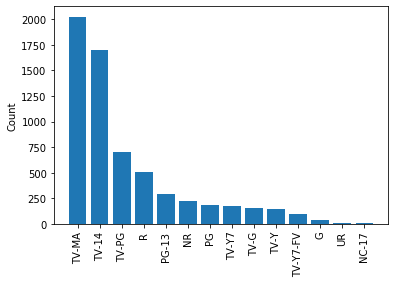

In [22]:
plt.bar(rating_count.nlargest(rating_count.shape[0]).index, rating_count.nlargest(rating_count.shape[0]))
plt.xticks(rotation=90)
plt.ylabel('Count')

In [32]:
df['rating'].nunique()

14

Text(0, 0.5, 'Count')

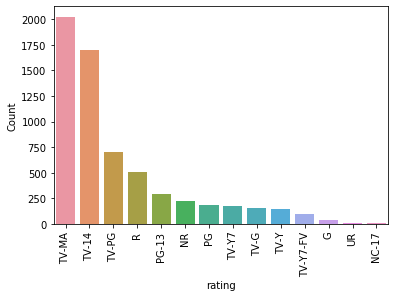

In [33]:
ax = sns.countplot(x="rating", data=df, order=df['rating'].value_counts().index[0:df['rating'].nunique()])
plt.xticks(rotation=90)
plt.ylabel('Count')

In [43]:
movies=df[(df.type == "Movie")]
movies

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
0,81145628,Movie,Norm of the North: King Sized Adventure,"Richard Finn, Tim Maltby","Alan Marriott, Andrew Toth, Brian Dobson, Cole...","United States, India, South Korea, China","September 9, 2019",2019,TV-PG,90 min,"Children & Family Movies, Comedies",Before planning an awesome wedding for his gra...
1,80117401,Movie,Jandino: Whatever it Takes,NaN,Jandino Asporaat,United Kingdom,"September 9, 2016",2016,TV-MA,94 min,Stand-Up Comedy,Jandino Asporaat riffs on the challenges of ra...
4,80125979,Movie,#realityhigh,Fernando Lebrija,"Nesta Cooper, Kate Walsh, John Michael Higgins...",United States,"September 8, 2017",2017,TV-14,99 min,Comedies,When nerdy high schooler Dani finally attracts...
6,70304989,Movie,Automata,Gabe Ibáñez,"Antonio Banderas, Dylan McDermott, Melanie Gri...","Bulgaria, United States, Spain, Canada","September 8, 2017",2014,R,110 min,"International Movies, Sci-Fi & Fantasy, Thrillers","In a dystopian future, an insurance adjuster f..."
7,80164077,Movie,Fabrizio Copano: Solo pienso en mi,"Rodrigo Toro, Francisco Schultz",Fabrizio Copano,Chile,"September 8, 2017",2017,TV-MA,60 min,Stand-Up Comedy,Fabrizio Copano takes audience participation t...
...,...,...,...,...,...,...,...,...,...,...,...,...
5577,80085438,Movie,Frank and Cindy,G.J. Echternkamp,NaN,United States,"April 1, 2016",2007,TV-MA,70 min,Documentaries,Frank was a rising pop star when he married Ci...
5578,80085439,Movie,Frank and Cindy,G.J. Echternkamp,"Rene Russo, Oliver Platt, Johnny Simmons, Jane...",United States,"April 1, 2016",2015,R,102 min,"Comedies, Dramas, Independent Movies",A student filmmaker vengefully turns his camer...
5579,80011846,Movie,Iverson,Zatella Beatty,Allen Iverson,United States,"April 1, 2016",2014,NR,88 min,"Documentaries, Sports Movies",This unfiltered documentary follows the rocky ...
5580,80064521,Movie,Jeremy Scott: The People's Designer,Vlad Yudin,Jeremy Scott,United States,"April 1, 2016",2015,PG-13,109 min,Documentaries,The journey of fashion designer Jeremy Scott f...


In [63]:
movies_duration_min=movies.duration.str.extract('(\d+)')
movies_duration_min.columns=['duration in min']
movies_duration_min

,duration in min
0,90
1,94
4,99
6,110
7,60
...,...
5577,70
5578,102
5579,88
5580,109


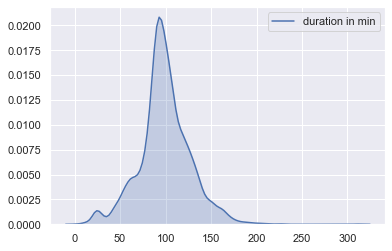

In [64]:
sns.set(style="darkgrid")
sns.kdeplot(data=movies_duration_min['duration in min'], shade=True)